In [1]:
import torch
import seaborn as sns
import numpy as np
import random
import os

In [2]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

In [3]:
seed_everything(seed=50)

In [4]:
batch_size = 3
seq_len = 5
emb_size = 4

### Simple self-attention without parameters

In [11]:
sample = torch.randn(size=(batch_size, seq_len, emb_size))

In [12]:
sample.shape

torch.Size([3, 5, 4])

In [13]:
sample[0]

tensor([[-1.1805,  0.0810,  0.1528,  1.0364],
        [ 0.9567, -0.4765, -1.7890,  0.0378],
        [-0.4655, -0.3508, -2.2190,  0.0446],
        [ 0.2860, -1.7712,  1.4121,  0.2956],
        [ 0.2176, -0.2864, -0.5551,  0.7846]])

In [14]:
raw_score = torch.bmm(sample, torch.transpose(sample, dim0=1, dim1=2))

# raw_score /= torch.sqrt(torch.Tensor(emb_size))

raw_score.shape

torch.Size([3, 5, 5])

In [15]:
raw_score[0]

tensor([[ 2.4975, -1.4022,  0.2282,  0.0410,  0.4483],
        [-1.4022,  4.3443,  3.6933, -1.3975,  1.3674],
        [ 0.2282,  3.6933,  5.2657, -2.6322,  1.2660],
        [ 0.0410, -1.3975, -2.6322,  5.3006,  0.0176],
        [ 0.4483,  1.3674,  1.2660,  0.0176,  1.0531]])

In [16]:
score = torch.softmax(raw_score, dim=2)

score[0]

tensor([[7.4728e-01, 1.5131e-02, 7.7255e-02, 6.4067e-02, 9.6271e-02],
        [2.0230e-03, 6.3336e-01, 3.3032e-01, 2.0325e-03, 3.2271e-02],
        [5.2646e-03, 1.6836e-01, 8.1121e-01, 3.0138e-04, 1.4862e-02],
        [5.1364e-03, 1.2188e-03, 3.5457e-04, 9.8827e-01, 5.0176e-03],
        [1.2116e-01, 3.0377e-01, 2.7447e-01, 7.8764e-02, 2.2184e-01]])

In [17]:
score[0].sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [18]:
cont_emb = torch.bmm(score, sample)

In [19]:
cont_emb[0]

tensor([[-0.8644, -0.1148, -0.0473,  0.8729],
        [ 0.4574, -0.4303, -1.8808,  0.0667],
        [-0.2194, -0.3692, -2.1083,  0.0597],
        [ 0.2787, -1.7522,  1.3906,  0.3015],
        [ 0.0906, -0.4343, -1.1459,  0.3466]])

<AxesSubplot:>

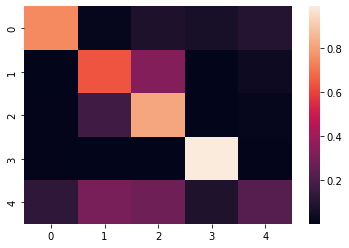

In [20]:
sns.heatmap(score[0])

### Add parameters (Manual)

In [21]:
new_emb_size = 3

In [22]:
weight_k = torch.randn(size=(emb_size, new_emb_size))
weight_q = torch.randn(size=(emb_size, new_emb_size))
weight_v = torch.randn(size=(emb_size, new_emb_size))

out = torch.randn(size=(new_emb_size, emb_size))

In [23]:
weight_k

tensor([[ 2.0996, -0.3499, -0.2142],
        [-0.1858, -0.5034,  0.8658],
        [ 1.3525, -1.4629,  0.2773],
        [-0.7639, -0.2642, -0.4847]])

In [24]:
torch.matmul(sample, weight_k)

tensor([[[-3.0787, -0.1250, -0.1370],
         [-0.3512,  2.5122, -1.1318],
         [-3.9474,  3.5739, -0.8409],
         [ 2.6136, -1.3523, -1.3466],
         [-0.8401,  0.6729, -0.8288]],

        [[-0.1899, -0.8097, -0.3441],
         [-1.9266,  1.0747,  1.6985],
         [ 3.4077, -0.7077, -0.4759],
         [-1.0911, -0.8702, -0.1545],
         [ 3.3216,  0.1063,  0.0116]],

        [[-1.0448,  0.4755,  0.1138],
         [ 4.9363, -0.5764,  0.4906],
         [-1.7276,  1.2688,  0.0864],
         [-1.2260,  1.9583,  0.3304],
         [-0.2707,  0.3336, -0.9970]]])

In [25]:
key = torch.matmul(sample, weight_k)
query = torch.matmul(sample, weight_q)
values = torch.matmul(sample, weight_v)

In [26]:
key.shape

torch.Size([3, 5, 3])

In [27]:
raw_score = torch.bmm(query, key.transpose(dim0=1, dim1=2))

In [28]:
score = torch.softmax(raw_score / np.sqrt(emb_size), dim=2)

# score = torch.softmax(raw_score, dim=2)

In [29]:
score.shape

torch.Size([3, 5, 5])

In [30]:
values.shape

torch.Size([3, 5, 3])

In [31]:
cont_emb = torch.bmm(score, values)

In [32]:
out_emb = torch.matmul(cont_emb, out)

In [33]:
out_emb.shape

torch.Size([3, 5, 4])

In [38]:
out_emb

tensor([[[-3.9440, -1.0132,  0.0673, -1.9436],
         [11.6907,  2.7958,  2.1171,  0.4195],
         [ 3.0139,  0.7427,  0.8158, -0.5670],
         [10.2175,  2.3155,  1.7518,  0.7493],
         [ 5.9813,  1.5480,  1.3302, -0.5142]],

        [[-4.2152, -1.5005, -1.2296,  1.5320],
         [-6.4234, -2.4648, -1.9608,  2.7472],
         [-4.5870,  1.0956,  0.8418, -6.6873],
         [-6.5758, -2.6524, -2.1090,  3.2041],
         [-4.4665,  1.1344,  0.8683, -6.7057]],

        [[ 0.1710, -0.5897, -0.2192,  1.3262],
         [-3.1908,  0.2608,  0.0864, -2.8792],
         [ 1.1164, -0.3726, -0.0635,  1.4077],
         [ 1.3178,  0.0914,  0.2597,  0.2513],
         [ 0.4866,  0.0423,  0.1518, -0.0515]]])

### Add parameters (Torch model)

In [34]:
from torch import nn
import torch.nn.functional as F

In [39]:
class SelfAttention(nn.Module):
    
    def __init__(
        self,
        num_heads: int, 
        emb_size: int,
        new_emb_size: int
    ):
        super().__init__()
        self.num_heads = num_heads
        self.emb_size = emb_size
        self.new_emb_size = new_emb_size
        
        self.to_keys = nn.Linear(
            in_features=emb_size,
            out_features=num_heads * new_emb_size,
            bias=False
        )
        self.to_queries = nn.Linear(
            in_features=emb_size,
            out_features=num_heads * new_emb_size,
            bias=False
        )
        self.to_values = nn.Linear(
            in_features=emb_size,
            out_features=num_heads * new_emb_size,
            bias=False
        )
        
        self.to_old_emb_size = nn.Linear(
            in_features=num_heads * new_emb_size,
            out_features=emb_size
        )
            
        
    def forward(self, data: torch.Tensor) -> torch.Tensor:
        
        queries = self.to_queries(data)
        keys = self.to_keys(data)
        values = self.to_values(data)
        
        raw = torch.bmm(
            queries, 
            keys.transpose(dim0=1, dim1=2)
        )
        
        score = torch.softmax(raw / np.sqrt(self.emb_size), dim=2)
        
        out = torch.bmm(score, values)
        
        return self.to_old_emb_size(out)

In [48]:
s_attn = SelfAttention(
    num_heads=1, 
    emb_size=emb_size,
    new_emb_size=new_emb_size
)

In [49]:
s_attn(sample)

tensor([[[ 0.3230, -0.3001, -0.1498, -0.3388],
         [ 0.3428, -0.2814, -0.1335, -0.3267],
         [ 0.3286, -0.2979, -0.1380, -0.3399],
         [ 0.2972, -0.3365, -0.1485, -0.3639],
         [ 0.3345, -0.2883, -0.1425, -0.3303]],

        [[ 0.1972, -0.4585, -0.1482, -0.4970],
         [ 0.2393, -0.4212, -0.0942, -0.4966],
         [ 0.2033, -0.4556, -0.1373, -0.4960],
         [ 0.1962, -0.4589, -0.1502, -0.4972],
         [ 0.2196, -0.4421, -0.1152, -0.4955]],

        [[ 0.3598, -0.2027, -0.1163, -0.4666],
         [ 0.3736, -0.1990, -0.0984, -0.4469],
         [ 0.3593, -0.2008, -0.1173, -0.4713],
         [ 0.3734, -0.1907, -0.1033, -0.4593],
         [ 0.3541, -0.2075, -0.1218, -0.4701]]], grad_fn=<AddBackward0>)

In [72]:
class TransformerConfig:
    
    def __init__(self):
        self.num_heads = 2
        self.emb_size = 4
        self.new_emb_size = 2
        self.factor = 2
        self.n_targets = 1

In [73]:
class TransformerBlock(nn.Module):
    
    def __init__(self, config: TransformerConfig):
        super().__init__()
        self.config = config
        self.attention = SelfAttention(
            num_heads=config.num_heads,
            emb_size=config.emb_size,
            new_emb_size=config.new_emb_size
        )
        
        self.norm1 = nn.LayerNorm(config.emb_size)
        self.norm2 = nn.LayerNorm(config.emb_size)
        
        self.mlp = nn.Sequential(
            nn.Linear(
                config.emb_size, 
                config.factor * config.emb_size
            ),
            nn.ReLU(),
            nn.Linear(
                config.factor * config.emb_size,
                config.emb_size
            ),
        )
        
    def forward(self, data: torch.Tensor) -> torch.Tensor:
        data = self.attention(data) + data
        
        data = self.norm1(data)
        
        data = self.norm2(self.mlp(data) + data)
        
        return data

In [74]:
config = TransformerConfig()

In [75]:
block = TransformerBlock(config)

In [76]:
sample.shape

torch.Size([3, 5, 4])

In [77]:
block(sample)

tensor([[[-1.6183,  0.5111,  0.0501,  1.0571],
         [ 1.3903,  0.2462, -1.3959, -0.2406],
         [ 0.4557,  0.8096, -1.7135,  0.4481],
         [ 0.1047, -1.5131,  1.2991,  0.1093],
         [ 0.7847, -0.1913, -1.5560,  0.9626]],

        [[-1.1830, -0.7850,  0.8298,  1.1382],
         [-0.2906,  1.7067, -0.6984, -0.7176],
         [ 1.7050, -0.2815, -0.6941, -0.7294],
         [-1.5759, -0.1451,  0.9460,  0.7749],
         [ 1.4814,  0.3477, -0.8391, -0.9900]],

        [[-1.1094,  1.6052, -0.4345, -0.0612],
         [ 1.2586,  0.3570, -0.1065, -1.5090],
         [-0.9546,  1.1934,  0.7851, -1.0238],
         [ 0.8565,  1.1140, -1.1899, -0.7807],
         [ 0.7017, -1.5599, -0.1650,  1.0232]]],
       grad_fn=<NativeLayerNormBackward0>)

In [81]:
class PositionalEncoding(nn.Module):

    def __init__(self, d_model, dropout, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=dropout)
        
        # Compute the positional encodings once in log space.
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) *
                             -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)
        
    def forward(self, x):
        x = x + Variable(self.pe[:, :x.size(1)], 
                         requires_grad=False)

        return self.dropout(x)

In [79]:
class ClfTransformerEncoder(nn.Module):
    
    def __init__(self, config: TransformerConfig):
        self.config = config
        
        self.emb_tokens = nn.Embedding(
            config.dict_size, 
            config.emb_size
        )
        
        self.pos_encoding = PositionalEncoding(config)
        
        blocks = [(f"block_{i}", TransformerBlock(config)) for i in config.num_blocks]
        
        self.blocks = nn.Sequential(*blocks)
        
        self.out_prob = nn.Linear(config.emb_size, config.n_targets)
        
    def forward(self, data: torch.Tensor) -> torch.Tensor:
        
        return data